In [ ]:
import numpy as np
import sklearn
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Linear Regression

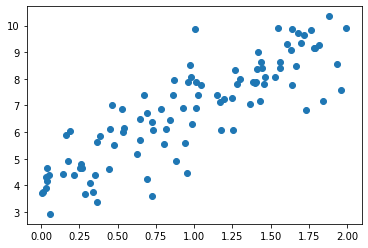

In [ ]:
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
plt.scatter(x,y)

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)
new_x=np.random.rand(100,1)
y_pred = lin_reg.predict(x)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("r_squared=",r2)
print("rmse=",rmse)
lin_reg.intercept_,lin_reg.coef_

r_squared= 0.7311431482776999
rmse= 0.9345060021415079


(array([4.10453533]), array([[2.78876496]]))

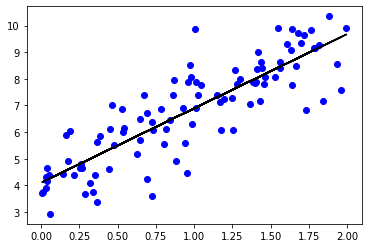

In [ ]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='black')

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * x_mean
predicted_y = slope * new_x + intercept
print("slope:",slope)
print("Intercept:",intercept)
#print("Predicted values: ",predicted_y)
rmse = mean_squared_error(y, predicted_y)
r2 = r2_score(y, predicted_y)
print("r_squared=",r2)
print("rmse=",rmse)

slope: 2.8013707659192306
Intercept: 4.367882589463342
r_squared= -0.7509923413252011
rmse= 6.037337233030673


In [ ]:
house=pd.read_csv("housing.csv")
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
house['total_bedrooms'].fillna(house['total_bedrooms'].mean(),inplace=True)
x_h=house[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y_h=house['median_house_value']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_h,y_h,test_size=0.25)
logr=LinearRegression().fit(X_train,Y_train)
pred_y=logr.predict(X_test)
rmse = mean_squared_error(Y_test, pred_y)
r2 = r2_score(Y_test, pred_y)
print("r_squared=",r2)
print("rmse=",rmse)

r_squared= 0.6322791551949218
rmse= 4899807652.136195


In [ ]:
x_h=sm.add_constant(x_h)
model = sm.OLS(y_h, x_h).fit()
predictions = model.predict(x_h)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4499.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:51:11   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20631   BIC:                         5.190e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.571e+06   6.26e+04    -57.035      0.000   -3.69e+06   -3.45e+06
longitude          -4.262e+04    714.112    -59.685      0.000    -4.4e+04   -4.12e+04
latitude           -4.248e+04    674.532    -62.976      0.000   -4.38e+04   -4.12e+04
housing_median_age  1144.4786     43.236     26.471      0.000    1059.733    1229.224
total_rooms           -6.6806      0.775     -8.621      0.000      -8.199      -5.162
total_bedrooms        82.4636      6.047     13.636      0.000      70.610      94.317
population           -39.8333      1.072    -37.164      0.000     -41.934     -37.732
households            78.1123      6.784     11.514      0.000      64.815      91.410
median_income       3.977e+04    331.942    119.815      0.000    3.91e+04    4.04e+04
==============================================================================
Omnibus:                     5040.064   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18972.448
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.056   Cond. No.                     5.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Logistic regression

In [ ]:
x=np.linspace(0,100.0,num=10).reshape(-1,1)
y=[random.randint(0, 1) for i in range(10)]
x1=np.linspace(0,100.0,num=10).reshape(-1,1)
logr=LogisticRegression().fit(x,y)
prob=logr.predict_proba(x1)
predicted = logr.predict(x1)
print(predicted)
print(prob)
score = logr.score(x,y)
score

[1 1 1 1 1 1 1 1 1 1]
[[0.38542201 0.61457799]
 [0.36494108 0.63505892]
 [0.34493765 0.65506235]
 [0.32546873 0.67453127]
 [0.30658438 0.69341562]
 [0.28832738 0.71167262]
 [0.2707331  0.7292669 ]
 [0.25382953 0.74617047]
 [0.23763744 0.76236256]
 [0.22217072 0.77782928]]


0.7

In [ ]:
diabetes=pd.read_csv("diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
y=diabetes['Outcome']
x=diabetes.drop('Outcome',axis=1)
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.3)
scaler=MinMaxScaler()
trainx=scaler.fit_transform(trainx)
testx=scaler.transform(testx)
logr=LogisticRegression().fit(trainx,trainy)
predy=logr.predict(testx)
print(classification_report(testy, predy))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       143
           1       0.80      0.47      0.59        88

    accuracy                           0.75       231
   macro avg       0.77      0.70      0.71       231
weighted avg       0.76      0.75      0.73       231



In [ ]:
import random
a=[random.randint(20,40) for i in range(1000)]
b=[random.randint(10000,50000) for i in range(1000)]
c=[random.randint(0, 1) for i in range(1000)]
cust=pd.DataFrame({'Age':a,'income':b,'bought magazine': c})
cust

,Age,income,bought magazine
0,35,40032,1
1,21,33946,0
2,31,26739,1
3,40,26567,1
4,25,37055,1
...,...,...,...
995,40,15803,0
996,39,34832,0
997,36,13401,0
998,39,42621,0


In [ ]:
y=cust['bought magazine']
x=cust.drop('bought magazine',axis=1)
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.25)
logr=LogisticRegression().fit(trainx,trainy)
predy=logr.predict(testx)
print(classification_report(testy, predy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.48      1.00      0.65       120

    accuracy                           0.48       250
   macro avg       0.24      0.50      0.32       250
weighted avg       0.23      0.48      0.31       250



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
bank=pd.read_csv("bank-additional-full.csv",sep=";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
bank = pd.get_dummies(bank, columns=categorical_cols)
scaler = StandardScaler()
bank[numeric_cols] = scaler.fit_transform(bank[numeric_cols])
X_train, X_test, y_train, y_test = train_test_split(bank.drop('y', axis=1), bank['y'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

